In [63]:
import pandas as pd
import sklearn as sk

In [64]:
#Read in review data

## Commented this out; created a smaller csv to work with because my computer can't handle 
## reviews and business data simultaneously.

#reviews = pd.read_csv("yelp_academic_dataset_review.csv")
#rvws = reviews.iloc[:5000,:]
#rvws.to_csv("yelp_dataset_5k_review.csv")

#Below csv was created previously using the first 5,000 reviews.
rvws = pd.read_csv("yelp_dataset_5k_review.csv")

In [65]:
#It's a HUGE dataset, so let's make a smaller one to work with until we have everything figured out.
#I've created a smaller one with the first 5,000 reviews.
rvws.describe()

,Unnamed: 0,votes.cool,votes.funny,stars,votes.useful
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,0.451600,0.362200,3.655200,0.900000
std,1443.520003,1.726689,1.509923,1.309754,1.806946
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1249.750000,0.000000,0.000000,3.000000,0.000000
50%,2499.500000,0.000000,0.000000,4.000000,0.000000
75%,3749.250000,0.000000,0.000000,5.000000,1.000000
max,4999.000000,61.000000,52.000000,5.000000,52.000000


In [70]:
## To make things easier when trying to analyze the text, let's just look at restaurants. For that, we'll have to join
## the business data and join them. I'm also pulling the city and state to add location later on.
headers = ['categories','business_id','city','state']
business = pd.read_csv("yelp_academic_dataset_business.csv", usecols = headers)


In [187]:
## Now that we have the data joined with the business information, we can narrow the dataset to just restaurants so that
## the language we are looking for is more consistent. 
## (e.g. a good doctor review will have differnt language than a good restaurant review)

reviews = pd.merge(rvws, business, on = 'business_id')
cat = reviews['categories']
rest = []

for x in range(len(cat)):
    if "Restaurants" in cat[x]:
        rest.append(1)
    else:
        rest.append(0)

reviews['restaurant'] = rest

## This will modify our reviews DataFrame to only include business that fall into the "restaurants" category.
reviews = reviews[reviews['restaurant'] == 1]
reviews = reviews.reset_index(drop=True)
reviews

,Unnamed: 0,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,categories,state,city,restaurant
0,22,LWbYpcangjBMm4KPxZGOKg,6w6gMZ3iBLGcUM4RBIuifQ,This place was DELICIOUS!! My parents saw a r...,0,mVHrayjG3uZ_RLHkLj-AMg,0,5,2012-12-01,review,5,"[u'Bars', u'American (New)', u'Nightlife', u'L...",PA,Braddock,1
1,23,m1FpV3EAeggaAdfPx0hBRQ,jVVv_DA5mCDB6mediuwHAw,Can't miss stop for the best Fish Sandwich in ...,0,mVHrayjG3uZ_RLHkLj-AMg,0,5,2013-03-15,review,0,"[u'Bars', u'American (New)', u'Nightlife', u'L...",PA,Braddock,1
2,24,8fApIAMHn2MZJFUiCQto5Q,3Es8GsjkssusYgeU6_ZVpQ,This place should have a lot more reviews - bu...,1,mVHrayjG3uZ_RLHkLj-AMg,0,5,2013-03-30,review,2,"[u'Bars', u'American (New)', u'Nightlife', u'L...",PA,Braddock,1
3,25,uK8tzraOp4M5u3uYrqIBXg,KAkcn7oQP1xX8KsZ-XmktA,This place was very good. I found out about Em...,0,mVHrayjG3uZ_RLHkLj-AMg,0,4,2013-10-20,review,1,"[u'Bars', u'American (New)', u'Nightlife', u'L...",PA,Braddock,1
4,26,6wvlM5L4_EroGXbnb_92xQ,BZNJkkP0bXnwQ2-sCqat2Q,"Old school.....traditional ""mom 'n pop"" qualit...",0,mVHrayjG3uZ_RLHkLj-AMg,0,5,2013-11-07,review,0,"[u'Bars', u'American (New)', u'Nightlife', u'L...",PA,Braddock,1
5,27,345nDw0oC-jOcglqxmzweQ,VDTIbR3G5_IPkpXbo2MutA,Seen this restaurant on 25 best places in Pitt...,1,mVHrayjG3uZ_RLHkLj-AMg,0,5,2014-03-22,review,2,"[u'Bars', u'American (New)', u'Nightlife', u'L...",PA,Braddock,1
6,28,u9ULAsnYTdYH65Haj5LMSw,5uyYmniYyIB_wtKtyXDudQ,Wonderful reuben. Map shown on Yelp page is i...,0,mVHrayjG3uZ_RLHkLj-AMg,0,4,2014-09-29,review,0,"[u'Bars', u'American (New)', u'Nightlife', u'L...",PA,Braddock,1
7,29,pdHC0oAcG7gNdhuFRAUu0Q,zyn_Libz9VZTZ--OdC4-tQ,Good fish sandwich.,0,mVHrayjG3uZ_RLHkLj-AMg,0,5,2014-09-29,review,0,"[u'Bars', u'American (New)', u'Nightlife', u'L...",PA,Braddock,1
8,30,tAKjY3bQXH51msJbOHYPmQ,uf61rPucuICXhSPXlZ1hIQ,"After a morning of Thrift Store hunting, a fri...",0,mVHrayjG3uZ_RLHkLj-AMg,0,5,2014-11-03,review,0,"[u'Bars', u'American (New)', u'Nightlife', u'L...",PA,Braddock,1
9,31,Kq8-FUG7d_MT2qRNiNBJnA,xY2gjy49dnpQSB2RTZzqCw,"This is a hidden gem, no really. It took us fo...",0,mVHrayjG3uZ_RLHkLj-AMg,0,4,2014-12-18,review,0,"[u'Bars', u'American (New)', u'Nightlife', u'L...",PA,Braddock,1


In [188]:
text = reviews[['text']]
stars = reviews[['stars']]

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

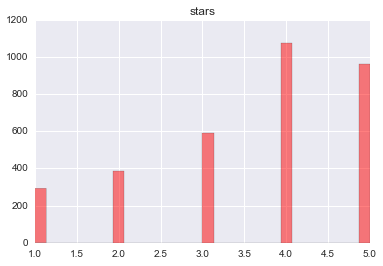

In [186]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
ax = stars.hist(color='red', alpha=0.5, bins = 30)
ax.set_xlabel("Stars")
ax.set_ylabel("Number of reviews")

In [133]:
print stars.describe()

count    3307.000000
mean        3.612035
std         1.258635
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: stars, dtype: float64


###Looking at the description and graph of the breakout, one idea might be to run a logistic regression, with reviewswith 4 and 5 stars being "Good" and reviews with 1, 2 and 3 stars being "bad" (or "not good"). In case we want to do this, let's start breaking out the data as such.

In [192]:
## Let's iterate through the "stars" array and make it a dummy variable - 1 if it's 4 or 5 stars, 0 if it's 1-3 stars.

#good = []

#for x in range(len(stars)):
#    if stars.iloc[x] == 5 or stars.iloc[x] == 4:
#        good.append(1)
#    else:
#        good.append(0)


#from numpy import asarray
#good = asarray(good)
#type(good)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [164]:
## Next let's work on pulling some data out of the text. First, similar to the "spam" e-mail lab, we'll pull out some
## word and character frequencies.
